In [ ]:
# Install latex for the plots
! sudo apt-get update
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

In [ ]:
# Google Drive stuff for colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd  /content/drive/My\ Drive/Year\ 4\:\ Synthesis/NS162\:\ Statistical\ Mechanics/Renormalization\ Research\ Project/renormalization/supervised_convnet/t_2.269/3x3/

In [1]:
# import stuff
import matplotlib.pyplot as plt
import train#, frozen
import sys
# sys.path.insert(0, "../../")
import supervised_convnet
import pickle
from collections import defaultdict
import numpy as np
from matplotlib import rc
# rc('font',**{'size': 25})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

Uncorrelated [[ 0.45  0.3   0.45  0.45  0.45  0.45  0.45  0.45  0.45]
 [ 0.45  0.45  0.45  0.15  0.45  0.23  0.45  0.45  0.45]
 [ 0.3   0.38  0.45 -0.35  0.38  0.07  0.45  0.45  0.45]
 [ 0.45  0.39  0.38 -0.35 -0.03 -0.11  0.45  0.45  0.3 ]
 [ 0.3   0.45  0.45 -0.12 -0.04 -0.51  0.3   0.16  0.22]
 [ 0.22  0.45  0.22 -0.11  0.45 -0.36  0.22 -0.19  0.06]
 [ 0.29  0.45  0.3  -0.51 -0.51 -0.45  0.45 -0.29 -0.51]
 [ 0.45  0.45  0.21 -0.51 -0.36 -0.51 -0.18 -0.51 -0.5 ]
 [ 0.3   0.39  0.45 -0.51 -0.51 -0.44 -0.51 -0.51 -0.51]]
Correlated [[-0.11  0.12 -0.14  0.45  0.29  0.45  0.39  0.45  0.22]
 [ 0.38  0.23 -0.51  0.45  0.39  0.14  0.45  0.39  0.14]
 [ 0.3   0.29 -0.03  0.07  0.45  0.4   0.23  0.45  0.45]
 [-0.04  0.3   0.04 -0.29  0.22  0.45  0.45  0.45 -0.1 ]
 [ 0.38  0.39  0.45  0.04  0.45  0.22  0.45  0.45  0.38]
 [ 0.32  0.14  0.45  0.3   0.45  0.29  0.22  0.23  0.23]
 [-0.02  0.45  0.4   0.45  0.45  0.45  0.38 -0.11  0.21]
 [ 0.3   0.29  0.45  0.45  0.45  0.45  0.29  0.3   0.45]
 [ 0.4

# Histogram of unfrozen vs. frozen

([<matplotlib.axis.YTick at 0x1a2b0ed668>,
 <a list of 6 Text yticklabel objects>)

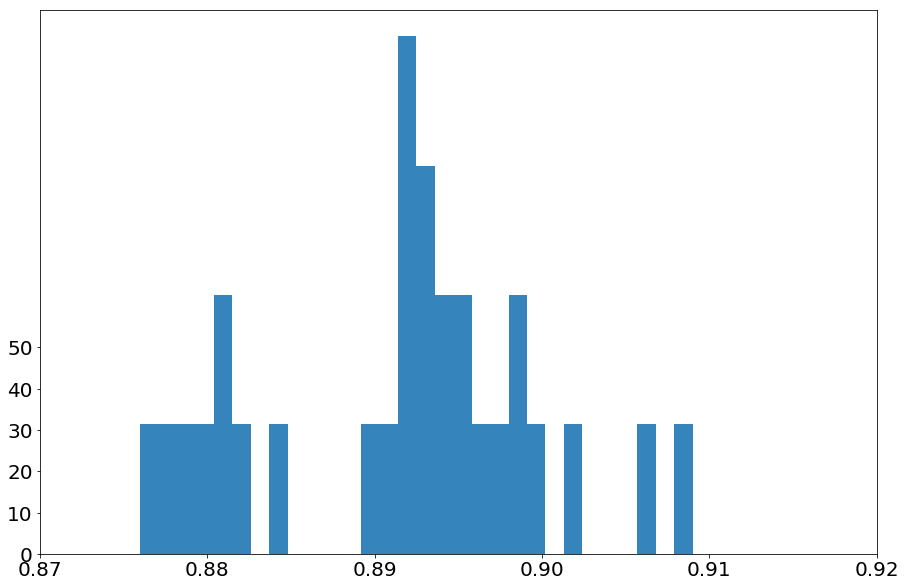

In [30]:
prefix = ""
filename = "unfrozen_convolution_relu.pl"
with open(prefix + filename, "rb") as handle:
    results = pickle.load(handle)
b = np.array(results["best_val_acc_hist"])
b = (b[b > 0.87])
plt.figure(figsize=(15,10))
plt.hist(b, 30, alpha = 0.9, label = "unfrozen", density=True)
plt.xticks(np.arange(0.87, 0.92, 0.01), fontsize = 20)
plt.yticks(np.arange(0, 60, 10), fontsize = 20)

In [31]:
len(b)

29

In [13]:
b[82]

0.9155

In [16]:
results["conv_params"]["weight"][82]

tensor([[[[-0.3833, -0.0056, -0.4275],
          [-0.0172,  0.1212, -0.0063],
          [-0.4010, -0.0461, -0.3762]]]])

In [ ]:
import subprocess
# subprocess.check_call(["latex"])
import os 
os.environ["PATH"] += os.pathsep + '/usr/bin'
prefix = ""
# filenames = ["frozen_convolution_pretrained_relu.pl", "frozen_convolution_no_center_relu.pl",
#         "unfrozen_convolution_relu.pl"], "frozen_convolution_with_center_relu.pl"]
filenames = ["unfrozen_convolution_relu.pl"]
labels = [ "Frozen convolution",
"Unfrozen Convolution", "Frozen convolution, pretrained","frozen convolution with center relu"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy", fontsize = 30)
plt.ylabel("Density", fontsize = 30)
for index, filename in enumerate(filenames):
    with open(prefix + filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 2:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.6])
        plt.hist(b, alpha = alphas[index], label = labels[index], density=True)
        plt.xticks(np.arange(0.87, 0.92, 0.01), fontsize = 40)
        plt.yticks(np.arange(0, 60, 10), fontsize = 40)
        print("mean", np.mean(b))
        print(len(b))
        print("std", np.std(b)/np.sqrt(len(b)))
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()

# Histogram for 1 channel vs. many channels

In [ ]:
prefix = ""
filenames = ["unfrozen_convolution_relu.pl", "unfrozen_convolution_2_channels.pl", "unfrozen_convolution_3_channels.pl",
        ]#, "frozen_convolution_with_center_relu.pl"]
labels = ["1 channel","2 channels", "3 channels", "frozen convolution with center relu"]
alphas = [0.8, 0.6, 0.4, 0.2]
plt.figure(figsize=(15,10))
plt.xlabel("Accuracy")
plt.ylabel("Density")
for index, filename in enumerate(filenames[:3]):
    with open(prefix + filename, "rb") as handle:
        results = pickle.load(handle)
    if index <= 2:
        b = np.array(results["best_val_acc_hist"])
        b = (b[b > 0.6])
        plt.hist(b, 10, alpha = alphas[index], label = labels[index], density=True)
        print("mean", np.mean(b))
        print(len(b))
        print("std", np.std(b)/np.sqrt(len(b)))
    else:
        plt.hist(results, alpha = alphas[index], label = labels[index], normed=True)
    # print("filename", filename)
    # print("mean", np.mean(results))
    # print("std", np.std(results))
plt.legend()

# Histogram for multilayer training

In [ ]:
with open("../81x81/multilayer_1channel.pl", "rb") as handle:
    results = pickle.load(handle)
# w = results["conv_params"]
b = np.array(results["best_val_acc_hist"])
b = (b[b > 0.6])
plt.figure(figsize=(15,10))

plt.hist(b, 10, density=True)
plt.xlabel("Accuracy")
plt.ylabel("Density")


# Weights histogram

In [ ]:
with open("unfrozen_convolution_relu.pl", "rb") as handle:
    results = pickle.load(handle)
w = results["conv_params"]
a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
for par in w["weight"]:
    left_corner = par[0, 0, 0, 0]
    sign_convention = np.sign(left_corner)
    a.append(np.abs(left_corner))
    b.append(par[0, 0, 0, 1] * sign_convention)
    c.append(par[0, 0, 0, 2] * sign_convention)
    d.append(par[0, 0, 1, 0] * sign_convention)
    e.append(par[0, 0, 1, 1] * sign_convention)
    f.append(par[0, 0, 1, 2] * sign_convention)
    g.append(par[0, 0, 2, 0] * sign_convention)
    h.append(par[0, 0, 2, 1] * sign_convention)
    i.append(par[0, 0, 2, 2] * sign_convention)
a,b,c,d,e,f,g,h,i = [np.array(_)[np.abs(np.array(_)) < 0.2] for _ in [a,b,c,d,e,f,g,h,i]]
fig, axs = plt.subplots(3, 3)
print("axs", axs.shape)
fig.set_figheight(20)
fig.set_figwidth(25)
axs[0, 0].hist(a, 50)
axs[0, 0].axvline(1/8, color = "r", label = "Frozen \n convolution")
axs[0, 0].set_xlim(-0.05, 0.2)
axs[0, 1].hist(b, 50)
axs[0, 1].axvline(1/8, color = "r")
axs[0, 1].set_xlim(-0.05, 0.2)
axs[0, 2].hist(c, 50)
axs[0, 2].axvline(1/8, color = "r")
axs[0, 2].set_xlim(-0.05, 0.2)
axs[1, 0].hist(d, 50)
axs[1, 0].axvline(1/8, color = "r")
axs[1, 0].set_xlim(-0.05, 0.2)
axs[1, 1].hist(e, 50)
axs[1, 1].axvline(0, color = "r")
axs[1, 1].set_xlim(-0.05, 0.2)
axs[1, 2].hist(f, 50)
axs[1, 2].axvline(1/8, color = "r")
axs[1, 2].set_xlim(-0.05, 0.2)
axs[2, 0].hist(g, 50)
axs[2, 0].axvline(1/8, color = "r")
axs[2, 0].set_xlim(-0.05, 0.2)
axs[2, 1].hist(h, 50)
axs[2, 1].axvline(1/8, color = "r")
axs[2, 1].set_xlim(-0.05, 0.2)
axs[2, 2].hist(i, 50)
axs[2, 2].axvline(1/8, color = "r")
axs[2, 2].set_xlim(-0.05, 0.2)
for i in range(3):
    for j in range(3):
        axs[i, j].set_xlabel("Weight")
        axs[i, j].set_ylabel("Density")
handles, labels = axs[0, 0].get_legend_handles_labels()
print("labels", labels)
fig.legend(handles, labels, loc=(0.188, 0.87))
fig.show()

In [ ]:
i = 0
w = results["conv_params"][f"weight_{i}"]
a,b,c,d,e,f,g,h,i = [], [], [], [], [], [], [], [], []
for par in w:
    par = par.cpu().detach().numpy()
    left_corner = par[0, 0, 0, 0]
    sign_convention = np.sign(left_corner)
    a.append(np.abs(left_corner))
    b.append(par[0, 0, 0, 1] * sign_convention)
    c.append(par[0, 0, 0, 2] * sign_convention)
    d.append(par[0, 0, 1, 0] * sign_convention)
    e.append(par[0, 0, 1, 1] * sign_convention)
    f.append(par[0, 0, 1, 2] * sign_convention)
    g.append(par[0, 0, 2, 0] * sign_convention)
    h.append(par[0, 0, 2, 1] * sign_convention)
    i.append(par[0, 0, 2, 2] * sign_convention)
a,b,c,d,e,f,g,h,i = [np.array(_)[np.abs(np.array(_)) < 100] for _ in [a,b,c,d,e,f,g,h,i]]
fig, axs = plt.subplots(3, 3)
print("axs", axs.shape)
fig.set_figheight(20)
fig.set_figwidth(25)
axs[0, 0].hist(a, 50)
axs[0, 0].axvline(1/8, color = "r", label = "Frozen \n convolution")
axs[0, 0].set_xlim(-0.2, 0.7)
axs[0, 1].hist(b, 50)
axs[0, 1].axvline(1/8, color = "r")
axs[0, 1].set_xlim(-0.2, 0.7)
axs[0, 2].hist(c, 50)
axs[0, 2].axvline(1/8, color = "r")
axs[0, 2].set_xlim(-0.2, 0.7)
axs[1, 0].hist(d, 50)
axs[1, 0].axvline(1/8, color = "r")
axs[1, 0].set_xlim(-0.2, 0.7)
axs[1, 1].hist(e, 50)
axs[1, 1].axvline(0, color = "r")
axs[1, 1].set_xlim(-0.2, 0.7)
axs[1, 2].hist(f, 50)
axs[1, 2].axvline(1/8, color = "r")
axs[1, 2].set_xlim(-0.2, 0.7)
axs[2, 0].hist(g, 50)
axs[2, 0].axvline(1/8, color = "r")
axs[2, 0].set_xlim(-0.2, 0.7)
axs[2, 1].hist(h, 50)
axs[2, 1].axvline(1/8, color = "r")
axs[2, 1].set_xlim(-0.2, 0.7)
axs[2, 2].hist(i, 50)
axs[2, 2].axvline(1/8, color = "r")
axs[2, 2].set_xlim(-0.2, 0.7)
for i in range(3):
    for j in range(3):
        axs[i, j].set_xlabel("Weight")
        axs[i, j].set_ylabel("Density")
handles, labels = axs[0, 0].get_legend_handles_labels()
print("labels", labels)
fig.legend(handles, labels, loc=(0.188, 0.87))
fig.show()

# Hyperparameter tuning stuff

In [ ]:
!pip install -U --target=/usr/local/lib/python3.6/dist-packages git+https://github.com/anhhuyalex/Ax.git
  
%cd /content
# %cd /usr/local/lib/python3.6/dist-packages
!rm -rf botorch
%cd /content
!git clone https://github.com/pytorch/botorch.git
%cd botorch
!pip install .

In [38]:
# %cd  /content/drive/My\ Drive/Year\ 4\:\ Synthesis/NS162\:\ Statistical\ Mechanics/Renormalization\ Research\ Project/renormalization/supervised_convnet/t_2.269/3x3/
import pickle
# run_mode = "frozen_convolution_no_center_relu"
# run_mode = "frozen_convolution_pretrained_relu"
run_mode = "unfrozen_convolution_relu9x9"
# run_mode = "unfrozen_convolution_3_channels"
# run_mode = "unfrozen_convolution_2_channels"
with open(f"colab/hyperparameters_{run_mode}.pl", "rb") as handle:
    hyper = pickle.load(handle)

In [39]:
from ax import RangeParameter, ParameterType
from ax.service.ax_client import AxClient
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting

ax_client = AxClient()
ax_client = ax_client.from_json_snapshot(hyper["axclient"])

[INFO 10-10 19:52:22] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.
[INFO 10-10 19:52:25] ModelBridge: Leaving out out-of-design observations for arms: 92_0, 67_0, 78_0, 80_0, 82_0, 79_0, 52_0, 71_0, 62_0, 49_0, 84_0, 89_0, 53_0, 81_0, 91_0, 68_0, 83_0, 50_0, 44_0, 87_0, 88_0, 85_0, 54_0, 69_0, 86_0, 45_0, 70_0, 47_0, 48_0, 42_0, 63_0, 46_0
[INFO 10-10 19:52:25] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.


In [40]:
#pre-trained
ax_client.get_best_parameters()

({'batch_size': 1896,
  'train_size': 3306,
  'n_epochs': 171,
  'lr': 0.0546726475191285,
  'weight_decay': 0.00042262434757864525,
  'betas0': 0.0400624244473615,
  'betas1': 0.006810444317497676},
 ({'objective': 0.8849534889707429},
  {'objective': {'objective': 8.309316275145565e-06}}))

In [19]:
#unfrozen_convolution_relu
ax_client.get_best_parameters()

({'batch_size': 2341,
  'train_size': 5000,
  'n_epochs': 250,
  'lr': 0.0067611584271835305,
  'weight_decay': 0.0002477503181772309,
  'betas0': 0.19999999999975093,
  'betas1': 0.0008113153986722758},
 ({'objective': 0.8986833817420053},
  {'objective': {'objective': 0.0001319079991547474}}))

In [ ]:
#frozen_convolution_no_center_relu
ax_client.get_best_parameters()

In [ ]:
#unfrozen_convolution_2_channels
ax_client.get_best_parameters()

In [ ]:
#unfrozen_convolution_3_channels
ax_client.get_best_parameters()

# Mutual info calculation

In [ ]:
import matplotlib.pyplot as plt
import train, frozen
import sys
sys.path.insert(0, "../../")
import supervised_convnet
import pickle
from collections import defaultdict
import numpy as np
from matplotlib import rc
rc('font',**{'size': 20})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [ ]:
# Mutual information calculation
import numpy as np
from collections import defaultdict
import hashlib
correlated_data = np.load("../ising81x81_temp2.269.npy")

In [ ]:
correlated_data[0, :9, :9]

In [ ]:
def get_key(array):
    return hashlib.sha256(array.tostring()).hexdigest()
  
def normalize_counts(p_dict):
    normalizer = sum(p_dict.values())
    for config, count in p_dict.items():
        p_dict[config] = count / normalizer
    return p_dict

def mutual_info_fine_grained_boundary_3(data):
    """
    boundary is only the 3x3 bordering strip
    x x *x* | *x* x x
    x x *x* | *x* x x
    x x *x* | *x* x x
    """
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
    n_samples = 200 # for testing, remove later
    for sample in range(n_samples):
        if sample % 100 == 0:
            print(sample, p_xy)
        for row in range(n_rows - 3):
            for column in range(n_columns - 6):
                rectangle = data[sample, row:(row + 3), column:(column+6)]
                
                boundary_x = rectangle[:, 3]
                p_x[get_key(boundary_x)] += 1
                boundary_y = rectangle[:, 3]
                p_y[get_key(boundary_y)] += 1
                joint_boundary = np.array([np.hstack((boundary_x, boundary_y))])
                p_xy[get_key(joint_boundary)] += 1


    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
        
        
    
    # Generate all possible configurations of boundary conditions
    n = 6
    i = np.array(np.indices(n * (2,))).reshape(n, -1)
    xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, n)*2-1)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    for xy in xy_keys:
        joint_prob = p_xy[get_key(xy)]
        x = xy[:3]
        x_prob = p_x[get_key(x)]
        y = xy[3:6]
        y_prob = p_y[get_key(y)]
        print(f"xy: {xy}, joint_prob:_{joint_prob}, x_prob:_{x_prob}, y_prob:_{y_prob}")
        if joint_prob != 0:
            mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
        
        
            
    return p_xy, p_x, p_y, mi

p_xy, p_x, p_y, mi = mutual_info_fine_grained_boundary_3(correlated_data)

In [ ]:
len(p_xy.keys())

In [ ]:
mi #100

In [ ]:
def get_key(array):
    return hashlib.sha256(array.tostring()).hexdigest()
  
def normalize_counts(p_dict):
    normalizer = sum(p_dict.values())
    for config, count in p_dict.items():
        p_dict[config] = count / normalizer
    return p_dict

def mutual_info_fine_grained_5(data):
    """
    boundary is the 3x3 bordering strip and the 2 non-central spins bordering the border
    x *x* *x* | *x* *x* x
    x  x  *x* | *x*  x  x
    x *x* *x* | *x* *x* x
    """
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
    # n_samples = 100 # for testing, remove later
    for sample in range(n_samples):
        if sample % 100 == 0:
            print(sample, p_xy)
        for row in range(n_rows - 3):
            for column in range(n_columns - 6):
                rectangle = data[sample, row:(row + 3), column:(column+6)]
                boundary_x = np.hstack((rectangle[:, 2], rectangle[0, 1], rectangle[2, 1]))
                p_x[get_key(boundary_x)] += 1
                boundary_y = np.hstack((rectangle[:, 3], rectangle[0, 4], rectangle[2, 4]))
                p_y[get_key(boundary_y)] += 1
                joint_boundary = np.array([np.hstack((boundary_x, boundary_y))])
                p_xy[get_key(joint_boundary)] += 1
                


    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
        
        
    
    # Generate all possible configurations of boundary conditions
    n = 10
    i = np.array(np.indices(n * (2,))).reshape(n, -1)
    xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, n)*2-1)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    no_config = []
    for xy in xy_keys:
        joint_prob = p_xy[get_key(xy)]
        x = xy[0:5]
        x_prob = p_x[get_key(x)]
        y = xy[5:10]
        y_prob = p_y[get_key(y)]
#         print(f"boundary_x:{x}")
        if joint_prob != 0:
            mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
            no_config.append(xy)
        
        
            
    return p_xy, p_x, p_y, mi, no_config

p_xy, p_x, p_y, mi, no_config = mutual_info_fine_grained_all(correlated_data)

In [ ]:
mi

In [ ]:
len(no_config)

In [ ]:
with open("unfrozen_convolution_relu.pl", "rb") as handle:
    results = pickle.load(handle)
w = results["conv_params"]
b = results["best_val_acc_hist"]

In [ ]:
np.argmax(b)

In [ ]:
w["bias"][314]

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from torch.autograd import Variable

class SupervisedConvNet(nn.Module):
    def __init__(self, filter_size, square_size, hidden_size, num_hidden_layers, center,
                first_activation = "tanh", activation_func = "sigmoid",
                out_channels = 1):
        """
        Arguments:
        filter_size ~ size of the convolution kernel (3 x 3)
        square size ~ how many strides of convolution in the input
        """
        super(SupervisedConvNet, self).__init__()
        self.filter_size = filter_size
        self.square_size = square_size
        self.hidden_size = hidden_size
        self.out_channels = out_channels
        if first_activation == "tanh":
            self.first_activation = torch.tanh
        elif first_activation == "relu":
            self.first_activation = torch.nn.LeakyReLU(0.1)
        if activation_func == "sigmoid":
            self.activation_func = torch.sigmoid
        elif activation_func == "relu":
            self.activation_func = torch.nn.LeakyReLU(0.1)

        self.conv1 = nn.Conv2d(1, out_channels, filter_size, padding=0, stride = filter_size)
        # parameters
        param = {}
        if center == "keep":
            param['conv2d.weight'] = torch.tensor([[[[1.0, 1.0, 1.0],
                      [1.0, 1.0, 1.0],
                      [1.0, 1.0, 1.0]]]])/9
            param['conv2d.bias'] = torch.tensor([0.0])
            self.conv1.bias = torch.nn.Parameter(param['conv2d.bias'], requires_grad=False)
        elif center == "omit":
            param['conv2d.weight'] = torch.tensor([[[[1.0, 1.0, 1.0],
                      [1.0, 0.0, 1.0],
                      [1.0, 1.0, 1.0]]]])/8
            # param['conv2d.bias'] = torch.tensor([0.0])
        elif center == "pre_trained":
            param['conv2d.weight'] = torch.tensor([[[[-0.0900, -0.0407, -0.0965],
          [-0.0413, -0.0011, -0.0363],
          [-0.0906, -0.0344, -0.0908]]]])
            param['conv2d.bias'] = torch.tensor([-0.0345])
            self.conv1.bias = torch.nn.Parameter(param['conv2d.bias'], requires_grad=False)
        self.conv1.weight = torch.nn.Parameter(param['conv2d.weight'], requires_grad=False)


        self.first_linear = nn.Linear(self.out_channels * square_size ** 2, hidden_size)
        hidden_layer = [nn.Linear(hidden_size, hidden_size) for _ in range(num_hidden_layers)]
        self.linear_hidden = nn.ModuleList(hidden_layer)
        self.linear_output = nn.Linear(hidden_size, 1)



    def forward(self, x):
        x = self.first_activation(self.conv1(x))#.view(-1, 1, self.out_channels * self.square_size**2)
#         x = self.activation_func(self.first_linear(x))
#         for linear in self.linear_hidden:
#             x = self.activation_func(linear(x))
#         x = torch.sigmoid(self.linear_output(x))
#         x = x.squeeze(1)

        return x

In [ ]:
def coarse_grain_unfrozen_conv(correlated_data = correlated_data):
    run_mode = "frozen_convolution_pretrained_relu"
    mode = "run"
    if mode == "run":
        hidden_size = 10
        out_channels = 1
        num_hidden_layers = 1
        conv_params = defaultdict(list)


        if run_mode == "frozen_convolution_pretrained_relu":
            """
            """
            run_num = 1
            filename = f"frozen_convolution_pretrained_relu_{run_num}.pl"
            out_channels = 1
            try:
                with open(filename, "rb") as handle:
                    results = pickle.load(handle)
            except:
                results = []
            results = []
            model = SupervisedConvNet(filter_size = 3, square_size = 27, \
                    hidden_size = hidden_size, out_channels = out_channels,
                    center = "pre_trained", first_activation = "tanh",
                    activation_func = "relu", num_hidden_layers = num_hidden_layers)
            data = torch.tensor(correlated_data).unsqueeze(1).type('torch.FloatTensor')
            out = model(data)

    return out

def coarse_grain_frozen_conv(correlated_data = correlated_data):
    run_mode = "frozen_convolution_pretrained_relu"
    mode = "run"
    if mode == "run":
        hidden_size = 10
        out_channels = 1
        num_hidden_layers = 1
        conv_params = defaultdict(list)


        if run_mode == "frozen_convolution_pretrained_relu":
            """
            """
            run_num = 1
            filename = f"frozen_convolution_pretrained_relu_{run_num}.pl"
            out_channels = 1
            try:
                with open(filename, "rb") as handle:
                    results = pickle.load(handle)
            except:
                results = []
            results = []
            model = SupervisedConvNet(filter_size = 3, square_size = 27, \
                    hidden_size = hidden_size, out_channels = out_channels,
                    center = "pre_trained", first_activation = "tanh",
                    activation_func = "relu", num_hidden_layers = num_hidden_layers)
            data = torch.tensor(correlated_data).unsqueeze(1).type('torch.FloatTensor')
            out = model(data)

    return out



In [ ]:
out[0].shape

In [ ]:
correlated_data[0, :9, :9]

In [ ]:
coarse_grain_unfrozen_conv()[0]

In [ ]:
def mutual_info_coarse_grain(data):
    """
    data ~ coarse-grained data
    """
    data = np.round(data * 32)/32 # discretize data
    data = data.astype("float64")
    print(f"data: {data.dtype}")
    n_samples, n_rows, n_columns = data.shape
    print(n_samples, n_rows, n_columns)
    
    # compute counts
    p_xy = defaultdict(int)
    p_x = defaultdict(int)
    p_y = defaultdict(int)
#     n_samples = 100 # for testing, remove later
    for sample in range(n_samples):
        if sample % 100 == 0:
            print(sample, p_xy)
        for row in range(n_rows):
            for column in range(n_columns - 1):
                rectangle = data[sample, row, column:(column+2)]
                
                boundary_x = rectangle[0] #np.hstack((rectangle[0]))
                p_x[get_key(boundary_x)] += 1
                boundary_y = rectangle[1] #np.hstack((rectangle[1]))
                p_y[get_key(boundary_y)] += 1
                joint_boundary = np.hstack((boundary_x, boundary_y))
                
#                 return
                p_xy[get_key(joint_boundary)] += 1
    print(f"rectangle_{rectangle}, boundary_x: {boundary_x}, boundary_y: {boundary_y}, joint_boundary: {joint_boundary}")


    # Normalize counts
    p_xy = normalize_counts(p_xy)
    p_x = normalize_counts(p_x)
    p_y = normalize_counts(p_y)
        
        
    
    # Generate all possible configurations of boundary conditions
#     n = 2
#     i = np.array(np.indices(n * (2,))).reshape(n, -1)
#     xy_keys = (i[:, np.argsort(i.sum(0)[::-1], kind='mergesort')].T[::-1].reshape(-1, n)*2-1)
#     xy_keys = xy_keys.astype("float64")
    n = np.arange(-1, 1, 1/32)
    xy = []
    for x in n:
        for y in n:
            xy.append(np.array([x, y]))
    xy_keys = np.array(xy).astype("float64")
    print(f"xy_keys: {xy_keys.dtype}")
#     xy_keys = np.array(xy_keys, dtype = float)

    # mi = <log (p(x, y)/p(x)p(y))>
    mi = 0
    no_config = []
    for xy in xy_keys:
#         print(xy)
        joint_prob = p_xy[get_key(xy)]
        x = xy[0]
        x_prob = p_x[get_key(x)]
        y = xy[1]
        y_prob = p_y[get_key(y)]
#         print(f"boundary_x:{x}")
        if joint_prob != 0:
            mi += np.log2(joint_prob/(x_prob * y_prob)) * joint_prob
        else:
            no_config.append(xy)
        
        
            
    return p_xy, p_x, p_y, mi, no_config

unfrozen = coarse_grain_unfrozen_conv(correlated_data).squeeze(1).numpy()
p_xy, p_x, p_y, mi, no_config = mutual_info_coarse_grain(unfrozen)
print(f"p_xy: ")
print(p_xy)
print(f"p_x: {p_x}")
print(f"p_y: {p_y}")
print(f"mi: {mi}")

In [ ]:
frozen = coarse_grain_frozen_conv(correlated_data).squeeze(1)
p_xy, p_x, p_y, mi, no_config = mutual_info_coarse_grain(frozen.detach().numpy())
print(f"p_xy: {p_xy}")
print(f"p_x: {p_x}")
print(f"p_y: {p_y}")
print(f"mi: {mi}")

In [ ]:
mi

# Plot images

In [ ]:
plt.imshow(correlated_data[0])
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(-unfrozen[0])
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(np.sign(-unfrozen[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
uncorrelated_data = np.load("../81x81/ising81x81_temp2.269_uncorrelated81x81.npy")
plt.imshow(uncorrelated_data[0])
plt.xticks([])
plt.yticks([])